In [27]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import qiskit
%matplotlib inline

In [28]:
n=8

import random
def random_01str(list):
    for i in range(n):
        list.append(random.randint(0,1))

#Alice
alice_1=[]
random_01str(alice_1)
print(alice_1)

alice_2=[]
random_01str(alice_2)
print(alice_2)

[0, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 1, 0, 1, 0, 0, 1]


In [29]:
#Alice

# Create a Quantum Register with n qubits.
q = QuantumRegister(n,'q')

# Create a Quantum Circuit acting on the q register
A_circ = QuantumCircuit(q)

for i in range(n):
    if alice_1[i]==1:
        A_circ.x(q[i])
        
for j in range(n):
    if alice_2[j]==1:
        A_circ.h(q[j])

A_circ.barrier(q)
A_circ.draw()

In [30]:
#Bob
bob_1=[]

bob_2=[]
random_01str(bob_2)
print(bob_2)

[0, 1, 1, 0, 0, 1, 0, 1]


In [31]:
#Bob
c = ClassicalRegister(n,'c')
B_circ = QuantumCircuit(q,c)

for i in range(n):
    if bob_2[i]==1:
        B_circ.h(q[i])

B_circ.measure(q,c)
qc = A_circ + B_circ
qc.draw()

In [32]:
from qiskit import IBMQ
api_token = ''
IBMQ.enable_account(api_token)
backend_list = IBMQ.backends()
print(backend_list)
backend_sim = IBMQ.get_backend('ibmq_qasm_simulator')

/home/pd2vm/anaconda3/envs/QIS/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


[<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]


{'11100100': 1}


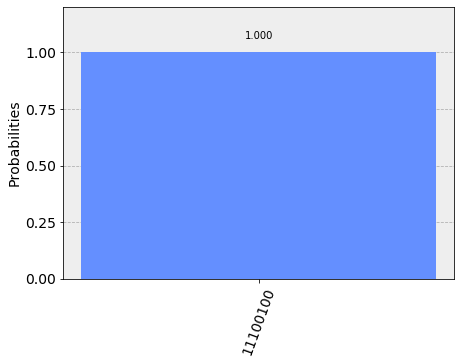

In [33]:
job_sim = qiskit.execute(qc, backend_sim, shots=1)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [34]:
result_str = list(counts)[0]
print(result_str)

bob_1.clear()
for i in range(n):
    bob_1.append(result_str[n-1-i])
    
print(bob_1)

11100100
['0', '0', '1', '0', '0', '1', '1', '1']


In [65]:
key=[]
pos=[]
for i in range(n):
    if alice_2[i]==bob_2[i]:
        key.append(bob_1[i])
        #print(i,end='')
        pos.append(i)

#print()
print("key1 = {}".format(key))
print("the same position : {}".format(pos))

key2=key

key1 = ['0', '1', '0', '1', '1']
the same position : [0, 2, 3, 6, 7]


In [66]:
#key2=key
print(key2)
print(pos)
num=len(key2)
total_times=len(key2)//2
right_times = 0
print(num)
print(total_times)

for i in range(total_times):
    rand=random.randint(0,num-1)
    if int(alice_1[pos[rand]])==int(bob_1[pos[rand]]):
        right_times+=1
    else :
        print("different")
    #print("rand = {}".format(rand),end=' ')
    print("check pos = {}".format(pos[rand]))
    del key2[rand]
    del pos[rand]
    num-=1
    
print(key2)
acc=(right_times/total_times)
print(acc*100,end='')    
print("%")  

['0', '1', '0', '1', '1']
[0, 2, 3, 6, 7]
5
2
rand = 0 check pos = 0
rand = 1 check pos = 3
['1', '1', '1']
100.0%
